In [ ]:
"""MAIN ALGORITHM FOR CLEANING THE TITANIC DATASET"""


import pandas as pd

# Load the dataset
df = pd.read_csv("titanic.csv")

# Check for duplicates
# duplicate_count = df.duplicated().sum()

# Remove duplicates
df = df.drop_duplicates()

# Fill Age column with median
med_age = df["Age"].median()
df["Age"] = df["Age"].fillna(med_age)

# Combine Parch & SibSp columns into a new column called FamSize
df["FamSize"] = df["Parch"] + df["SibSp"]

# Re-categorize the sex column to "M" & "F" for easy reading
df['Sex'] = df['Sex'].map({'male': 'M', 'female': 'F'})

# Adding "U" for unknown for the Embarked column
df["Embarked"] = df["Embarked"].fillna("U")




"""
    There are 3 values in Embarked: S, C, Q which stands for Southampton, Cherbourg, & Queenstown.
    Adding "U" for unknown for the Embarked column for those two missing values.
"""



# Dropping Cabin, Ticket, SibSp, Parch columns
df = df.drop(columns=["Cabin"])
df = df.drop(columns=["Ticket"])
df = df.drop(columns=["SibSp"])
df = df.drop(columns=["Parch"])

df.head(10) # Display the first 10 rows of the dataframe

In [ ]:
"""1ST DATA VISUALIZATION: NUMBER OF PASSENGERS FROM EMBARKED CITIES"""


import matplotlib.pyplot as plt

embarked_total = df['Embarked'].value_counts()

plt.figure(figsize=(8, 5))
plt.bar(embarked_total.index, embarked_total.values, color='skyblue')
plt.title('Number of Passengers from Embarked Cities')
plt.xlabel('Embarkation Point')
plt.ylabel('Number of Passengers')
plt.xticks(ticks=range(len(embarked_total.index)), labels=embarked_total.index)
plt.show()

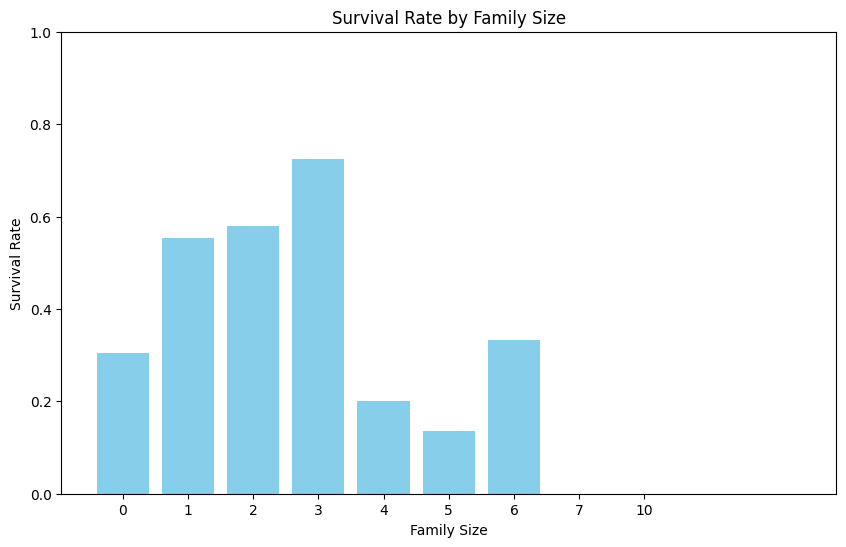

In [50]:
"""2ND DATA VISUALIZATION: SURVIVAL RATE BY FAMILY SIZE"""


import matplotlib.pyplot as plt

family_survival_rate = df.groupby('FamSize')['Survived'].mean()

plt.figure(figsize=(10, 6))
plt.bar(family_survival_rate.index, family_survival_rate.values, color='skyblue')
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.xticks(ticks=range(len(family_survival_rate.index)), labels=family_survival_rate.index)
plt.show()

1. I have chose this algorithm because it re-categorizes existing columns by merging the Parch & SibSp columns into one 'FamSize' which can be helpful in gathering data visualizations about groups, and instead of removing the age, I have decided to input the age median since removing them would affect the overall output of the data.

2. 
   - The first data visual is the number of passengers from embarked cities. The data shows that majority of the passengers departed from Southampton, England (S) and the least number of passengers are from Queenstown, Ireland (Q). By confirming this data, the Titanic first embarked from Southampton, England and just provided stops from other two cities to fill the passengers. Since it was the location of the maiden voyage, it's natural that most of the passengers came from Southampton, England.

   - The second data visual is the survival rate of family size. The family size is defined by summing the siblings & spouses (SibSp) and parents and children (Parch) since it was categorized as group of family. The data shows that a family of 3 of combined parents, siblings, children, and/or spouses has the highest survival rate while the family of 5 has the least survival rate. In that time, children, women, and the elderly people (sometimes including upper class) are prioritized by the lifeboats from the Titanic. The lower class often lefts out due to insufficient lifeboats resulting in the deaths of thousands of people.